In [1]:
import torch
torch.cuda.empty_cache()

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

In [3]:
gdsc_df = pd.read_csv("dataset/GDSC_SMILES_merged.csv", index_col=0)
gdsc_df

,DRUG_ID,DRUG_NAME,CELL_LINE_NAME,LN_IC50,SMILES
0,1003,Camptothecin,PFSK-1,-1.462148,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1,1003,Camptothecin,A673,-4.869447,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2,1003,Camptothecin,ES5,-3.360684,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3,1003,Camptothecin,ES7,-5.045014,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4,1003,Camptothecin,EW-11,-3.741620,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
...,...,...,...,...,...
242031,2499,N-acetyl cysteine,SNU-175,10.134495,CC(=O)NC(CS)C(=O)O
242032,2499,N-acetyl cysteine,SNU-407,8.575555,CC(=O)NC(CS)C(=O)O
242033,2499,N-acetyl cysteine,SNU-61,10.520666,CC(=O)NC(CS)C(=O)O
242034,2499,N-acetyl cysteine,SNU-C5,10.701430,CC(=O)NC(CS)C(=O)O


In [4]:
ccl_rep_df = pd.read_csv("dataset/PANCANCER_Genetic_feature.csv")

# Pivot to get binary matrix: rows = cell lines, columns = features
binary_feature_matrix = ccl_rep_df.pivot_table(
    index="cell_line_name",
    columns="genetic_feature",
    values="is_mutated",
    fill_value=0
).astype(int)

In [5]:
binary_feature_matrix.columns = binary_feature_matrix.columns.astype(str)

In [6]:
binary_feature_matrix

genetic_feature,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,ADCY1_mut,AFF4_mut,AHCTF1_mut,AHNAK_mut,AKAP9_mut,...,cnaPANCAN90,cnaPANCAN91,cnaPANCAN92,cnaPANCAN93,cnaPANCAN94,cnaPANCAN95,cnaPANCAN96,cnaPANCAN97,cnaPANCAN98,cnaPANCAN99
cell_line_name,,,,,,,,,,,,,,,,,,,,,
201T,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22RV1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23132-87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42-MG-BA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451Lu,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZR-75-30,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
huH-1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [7]:
binary_feature_matrix.index = binary_feature_matrix.index.str.upper()

In [8]:
import re

def clean_name(name):
    return re.sub(r'[^A-Za-z0-9]', '', name).upper()

### CCL embeddings

In [9]:
binary_feature_matrix.index = binary_feature_matrix.index.to_series().apply(clean_name)
binary_feature_matrix

genetic_feature,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,ADCY1_mut,AFF4_mut,AHCTF1_mut,AHNAK_mut,AKAP9_mut,...,cnaPANCAN90,cnaPANCAN91,cnaPANCAN92,cnaPANCAN93,cnaPANCAN94,cnaPANCAN95,cnaPANCAN96,cnaPANCAN97,cnaPANCAN98,cnaPANCAN99
cell_line_name,,,,,,,,,,,,,,,,,,,,,
201T,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22RV1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2313287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42MGBA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451LU,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZR7530,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
HUH1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


### Drugs

In [10]:
gdsc_df["CLEAN_CELL_LINE"] = gdsc_df["CELL_LINE_NAME"].apply(clean_name)
gdsc_df

,DRUG_ID,DRUG_NAME,CELL_LINE_NAME,LN_IC50,SMILES,CLEAN_CELL_LINE
0,1003,Camptothecin,PFSK-1,-1.462148,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,PFSK1
1,1003,Camptothecin,A673,-4.869447,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,A673
2,1003,Camptothecin,ES5,-3.360684,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,ES5
3,1003,Camptothecin,ES7,-5.045014,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,ES7
4,1003,Camptothecin,EW-11,-3.741620,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,EW11
...,...,...,...,...,...,...
242031,2499,N-acetyl cysteine,SNU-175,10.134495,CC(=O)NC(CS)C(=O)O,SNU175
242032,2499,N-acetyl cysteine,SNU-407,8.575555,CC(=O)NC(CS)C(=O)O,SNU407
242033,2499,N-acetyl cysteine,SNU-61,10.520666,CC(=O)NC(CS)C(=O)O,SNU61
242034,2499,N-acetyl cysteine,SNU-C5,10.701430,CC(=O)NC(CS)C(=O)O,SNUC5


### Fingerprints

In [11]:
def compute_morgan(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [0] * n_bits
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return list(fp)


In [12]:
unique_drugs = gdsc_df[["DRUG_ID", "SMILES"]].drop_duplicates().reset_index(drop=True)
unique_drugs["FINGERPRINT"] = unique_drugs["SMILES"].apply(compute_morgan)
fingerprint_dict = dict(zip(unique_drugs["DRUG_ID"], unique_drugs["FINGERPRINT"]))

### GSVA scores

In [13]:
gsva_df = pd.read_csv("dataset/ccle_gsva_scores.csv", index_col=0)
gsva_df

,X22RV1_PROSTATE,X2313287_STOMACH,X253JBV_URINARY_TRACT,X253J_URINARY_TRACT,X42MGBA_CENTRAL_NERVOUS_SYSTEM,X5637_URINARY_TRACT,X59M_OVARY,X639V_URINARY_TRACT,X647V_URINARY_TRACT,X697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,0.244789,-0.083931,0.279529,0.208577,-0.132328,0.215197,0.319143,-0.075647,0.277187,0.271370,...,0.075112,0.327630,-0.375213,-0.355703,-0.101719,-0.530021,-0.537348,0.275503,0.526732,0.220102
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,0.232631,0.414819,0.290806,0.670978,-0.274907,0.192912,0.640286,-0.506128,-0.057853,-0.455609,...,-0.274736,0.131784,0.551961,0.211546,-0.032558,0.151900,0.317689,-0.332108,-0.430653,0.182114
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,-0.186705,0.177009,-0.414291,-0.038181,0.207581,0.134153,0.586046,-0.158105,-0.045624,-0.519046,...,-0.145654,0.178017,0.254041,-0.116195,-0.179142,0.231483,0.155220,0.205721,-0.166378,0.045039
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,-0.540508,-0.258760,-0.138647,0.146632,-0.384697,-0.019662,0.407990,-0.288576,-0.125966,0.616469,...,0.087120,-0.160979,0.192224,0.457628,0.006197,-0.417248,-0.453304,-0.136213,0.387118,0.503203
KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,-0.166025,0.121127,-0.259766,-0.369504,0.117981,0.406653,-0.132804,0.414331,0.543123,-0.071814,...,0.112035,0.091719,-0.332850,0.156438,-0.064297,0.338911,0.224560,0.143953,0.002501,0.102778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,-0.117058,0.534826,0.499067,0.476963,0.491432,-0.041223,-0.021224,-0.637564,-0.262915,-0.128982,...,-0.316305,-0.194693,0.727817,0.157373,0.250761,-0.209867,0.035322,0.055748,0.194295,0.100961
KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,-0.071946,-0.235064,-0.158232,-0.471312,0.069451,0.552709,-0.219726,-0.231657,0.247514,0.479034,...,0.471183,0.543891,0.173360,0.325866,0.628831,0.454693,0.169221,0.040660,-0.249230,-0.453372
KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,-0.288375,-0.230789,-0.043607,-0.100954,-0.003728,0.443881,-0.040789,-0.123535,0.551131,0.003992,...,-0.070541,0.065449,0.058856,0.208207,0.303945,0.378906,0.233616,0.152003,-0.139507,-0.157565
KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,-0.566128,-0.454890,0.398130,0.312828,0.524678,0.477288,0.634019,-0.273644,0.437712,0.101343,...,0.100011,-0.227126,0.728999,0.366406,0.542634,-0.223423,0.224992,0.234498,-0.452274,-0.463809


In [14]:
gdsc_df["CELL_LINE_NAME"] = gdsc_df["CELL_LINE_NAME"].str.strip().str.upper()
cell_lines_obs = set(gdsc_df["CELL_LINE_NAME"].unique())

gsva_df.columns = gsva_df.columns.str.strip().str.upper()
cell_lines_available = sorted(set(gsva_df.columns.str.split("_").str[0].str.upper()))

In [15]:
cell_lines_available = {clean_name(name) for name in cell_lines_available}
cell_lines_obs = {clean_name(name) for name in cell_lines_obs}

In [16]:
common_cell_lines = cell_lines_obs.intersection(cell_lines_available)
print("Now common cell lines:", len(common_cell_lines))

Now common cell lines: 607


In [17]:
gsva_df.columns = gsva_df.columns.str.split("_").str[0].str.upper().to_series().apply(clean_name)
gsva_df.columns.has_duplicates

True

In [18]:
gsva_df = gsva_df.loc[:, ~gsva_df.columns.duplicated()]
print(gsva_df.columns.has_duplicates)
gsva_df

False


,X22RV1,X2313287,X253JBV,X253J,X42MGBA,X5637,X59M,X639V,X647V,X697,...,WSUDLCL2,YAPC,YD10B,YD15,YD38,YD8,YH13,YKG1,ZR751,ZR7530
KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,0.244789,-0.083931,0.279529,0.208577,-0.132328,0.215197,0.319143,-0.075647,0.277187,0.271370,...,0.075112,0.327630,-0.375213,-0.355703,-0.101719,-0.530021,-0.537348,0.275503,0.526732,0.220102
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,0.232631,0.414819,0.290806,0.670978,-0.274907,0.192912,0.640286,-0.506128,-0.057853,-0.455609,...,-0.274736,0.131784,0.551961,0.211546,-0.032558,0.151900,0.317689,-0.332108,-0.430653,0.182114
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,-0.186705,0.177009,-0.414291,-0.038181,0.207581,0.134153,0.586046,-0.158105,-0.045624,-0.519046,...,-0.145654,0.178017,0.254041,-0.116195,-0.179142,0.231483,0.155220,0.205721,-0.166378,0.045039
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,-0.540508,-0.258760,-0.138647,0.146632,-0.384697,-0.019662,0.407990,-0.288576,-0.125966,0.616469,...,0.087120,-0.160979,0.192224,0.457628,0.006197,-0.417248,-0.453304,-0.136213,0.387118,0.503203
KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,-0.166025,0.121127,-0.259766,-0.369504,0.117981,0.406653,-0.132804,0.414331,0.543123,-0.071814,...,0.112035,0.091719,-0.332850,0.156438,-0.064297,0.338911,0.224560,0.143953,0.002501,0.102778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,-0.117058,0.534826,0.499067,0.476963,0.491432,-0.041223,-0.021224,-0.637564,-0.262915,-0.128982,...,-0.316305,-0.194693,0.727817,0.157373,0.250761,-0.209867,0.035322,0.055748,0.194295,0.100961
KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,-0.071946,-0.235064,-0.158232,-0.471312,0.069451,0.552709,-0.219726,-0.231657,0.247514,0.479034,...,0.471183,0.543891,0.173360,0.325866,0.628831,0.454693,0.169221,0.040660,-0.249230,-0.453372
KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,-0.288375,-0.230789,-0.043607,-0.100954,-0.003728,0.443881,-0.040789,-0.123535,0.551131,0.003992,...,-0.070541,0.065449,0.058856,0.208207,0.303945,0.378906,0.233616,0.152003,-0.139507,-0.157565
KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,-0.566128,-0.454890,0.398130,0.312828,0.524678,0.477288,0.634019,-0.273644,0.437712,0.101343,...,0.100011,-0.227126,0.728999,0.366406,0.542634,-0.223423,0.224992,0.234498,-0.452274,-0.463809


# Creating Dataset

In [19]:
from rdkit import Chem
import torch
from torch_geometric.data import Data

from torch.utils.data import Dataset


In [20]:
# Define categorical vocabularies
ATOM_LIST = ['C', 'N', 'O', 'S', 'F', 'P', 'Cl', 'Br', 'I', 'H', 'B', 'Si', 'Na', 'K', 'Li', 'Mg', 'Ca', 'Fe', 'Zn', 'Se', 'Cu']
DEGREE_LIST = list(range(0, 11))
VALENCE_LIST = list(range(0, 7))
HYBRIDIZATION_LIST = [
    Chem.rdchem.HybridizationType.SP, Chem.rdchem.HybridizationType.SP2,
    Chem.rdchem.HybridizationType.SP3, Chem.rdchem.HybridizationType.SP3D,
    Chem.rdchem.HybridizationType.SP3D2
]
TOTAL_H_LIST = [0, 1, 2, 3, 4]
CHIRALITY_LIST = ['R', 'S']

In [21]:
def one_hot_encoding(x, allowable):
    return [int(x == s) for s in allowable]

In [22]:
def atom_features(atom):
    features = []
    features += one_hot_encoding(atom.GetSymbol(), ATOM_LIST)
    features += one_hot_encoding(atom.GetDegree(), DEGREE_LIST)
    features += one_hot_encoding(atom.GetImplicitValence(), VALENCE_LIST)
    features.append(atom.GetFormalCharge())
    features.append(atom.GetNumRadicalElectrons())
    features += one_hot_encoding(atom.GetHybridization(), HYBRIDIZATION_LIST)
    features.append(int(atom.GetIsAromatic()))
    features += one_hot_encoding(atom.GetTotalNumHs(), TOTAL_H_LIST)
    features.append(int(atom.IsInRing()))
    
    chirality = atom.GetProp('_CIPCode') if atom.HasProp('_CIPCode') else None
    features += one_hot_encoding(chirality, CHIRALITY_LIST)
    
    return features


In [23]:
def smiles_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    atom_feats = [atom_features(atom) for atom in mol.GetAtoms()]
    x = torch.tensor(atom_feats, dtype=torch.float)

    edge_index = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index.append((i, j))
        edge_index.append((j, i))  # undirected

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    return Data(x=x, edge_index=edge_index)

In [24]:
import re
from torch.utils.data import Dataset
import torch

class ModifiedMGATAFDataset(Dataset):
    def __init__(self, gdsc_df, fingerprint_dict, cell_feature_matrix, gsva_matrix, graph_dict):
        self.df = gdsc_df
        self.fingerprint_dict = fingerprint_dict  # drug_id -> np.array or list
        self.cell_features = cell_feature_matrix  # DataFrame: index=cell_line_name, values=mutation+cnv
        self.gsva_matrix = gsva_matrix            # DataFrame: index=cell_line_name, values=gsva scores
        self.graphs = graph_dict                  # drug_id -> graph object (PyG or DGL)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        drug_id = row["DRUG_ID"]
        cell_line = row["CLEAN_CELL_LINE"]

        # Drug molecular graph
        graph_data = self.graphs[drug_id]

        # Fingerprint vector
        fingerprint = torch.tensor(self.fingerprint_dict[drug_id], dtype=torch.float)

        # Cell line mutation/CNV features
        ccl_feat = torch.tensor(self.cell_features.loc[cell_line].values, dtype=torch.float)

        # GSVA pathway scores
        if cell_line not in gsva_matrix.index:
            raise ValueError(f"{cell_line} not found in GSVA matrix.")
        gsva_feat = torch.tensor(self.gsva_matrix.loc[cell_line].values, dtype=torch.float)

        # Target IC50
        ic50 = torch.tensor([row["LN_IC50"]], dtype=torch.float)

        return graph_data, fingerprint, ccl_feat, gsva_feat, ic50


In [25]:
# Step 1: Clean the GDSC cell line column
# gdsc_df["CELL_LINE_NAME_CLEAN"] = gdsc_df["CELL_LINE_NAME"].apply(clean_name)

# Step 2: Clean the index of the binary feature matrix
binary_feature_matrix.index = binary_feature_matrix.index.to_series().apply(clean_name)
binary_feature_matrix = binary_feature_matrix[~binary_feature_matrix.index.duplicated(keep='first')]

# Step 3: Clean GSVA matrix columns
gsva_df.columns = gsva_df.columns.to_series().apply(clean_name)
gsva_df = gsva_df.loc[:, ~gsva_df.columns.duplicated(keep='first')]

# Step 4: Determine valid IDs
valid_drugs = set(fingerprint_dict.keys())
valid_mutcnv_cells = set(binary_feature_matrix.index)
valid_gsva_cells = set(gsva_df.columns)

# Step 5: Get cell lines common to all three
common_cell_lines = valid_mutcnv_cells & valid_gsva_cells & set(gdsc_df["CLEAN_CELL_LINE"])
common_cell_lines = list(common_cell_lines)
# Step 6: Filter gdsc_df to keep only rows with common cell lines and valid drugs/SMILES
gdsc_df = gdsc_df[
    gdsc_df["DRUG_ID"].isin(valid_drugs) &
    gdsc_df["CLEAN_CELL_LINE"].isin(common_cell_lines) &
    gdsc_df["SMILES"].notna()
].reset_index(drop=True)

# Step 7: Filter binary_feature_matrix and gsva_matrix to keep only common cell lines
binary_feature_matrix = binary_feature_matrix.loc[common_cell_lines]
gsva_df = gsva_df.loc[:, list(common_cell_lines)]  # since cell lines are columns


In [26]:
gdsc_df

,DRUG_ID,DRUG_NAME,CELL_LINE_NAME,LN_IC50,SMILES,CLEAN_CELL_LINE
0,1003,Camptothecin,A673,-4.869447,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,A673
1,1003,Camptothecin,SK-ES-1,-5.143017,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,SKES1
2,1003,Camptothecin,COLO-829,-1.230277,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,COLO829
3,1003,Camptothecin,RT4,-2.962875,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,RT4
4,1003,Camptothecin,SW780,-1.447051,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,SW780
...,...,...,...,...,...,...
125091,2499,N-acetyl cysteine,MM1S,9.320173,CC(=O)NC(CS)C(=O)O,MM1S
125092,2499,N-acetyl cysteine,SNU-175,10.134495,CC(=O)NC(CS)C(=O)O,SNU175
125093,2499,N-acetyl cysteine,SNU-407,8.575555,CC(=O)NC(CS)C(=O)O,SNU407
125094,2499,N-acetyl cysteine,SNU-61,10.520666,CC(=O)NC(CS)C(=O)O,SNU61


In [27]:
binary_feature_matrix

genetic_feature,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,ADCY1_mut,AFF4_mut,AHCTF1_mut,AHNAK_mut,AKAP9_mut,...,cnaPANCAN90,cnaPANCAN91,cnaPANCAN92,cnaPANCAN93,cnaPANCAN94,cnaPANCAN95,cnaPANCAN96,cnaPANCAN97,cnaPANCAN98,cnaPANCAN99
cell_line_name,,,,,,,,,,,,,,,,,,,,,
UACC893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HCC1419,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
NCIH727,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
SW1710,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
SW1783,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAOY,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
LN18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KM12,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
drug_smiles = gdsc_df.drop_duplicates(subset="DRUG_ID")[["DRUG_ID", "SMILES"]]

In [29]:
precomputed_graphs = {}
for _, row in drug_smiles.iterrows():
    drug_id = row["DRUG_ID"]
    smi = row["SMILES"]
    graph = smiles_to_graph(smi)
    if graph is not None:
        precomputed_graphs[drug_id] = graph

In [30]:
gsva_df

,UACC893,HCC1419,NCIH727,SW1710,SW1783,IPC298,CORL311,NCIH1651,PANC0203,SKUT1,...,SW1088,HEL,NCIH2023,NCIH1915,H4,DAOY,LN18,KM12,EFM192A,SKCO1
KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,0.146552,-0.130636,0.014942,-0.577305,-0.225119,0.539797,-0.365771,-0.381781,-0.552913,-0.071349,...,-0.174673,-0.080268,0.362941,0.653026,-0.307635,-0.539282,-0.204200,0.732286,0.397440,0.244217
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,0.232411,-0.213994,0.443446,0.016478,0.325178,-0.068717,-0.398752,0.330446,-0.065988,-0.570162,...,-0.152846,-0.332053,0.701405,0.088303,0.411885,-0.309488,0.368529,0.103037,0.280003,0.431635
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,-0.197997,-0.335313,-0.125355,0.221044,0.310382,0.530061,-0.117046,-0.141600,0.044529,-0.336664,...,0.471115,0.075089,0.230424,0.464785,-0.201191,-0.258608,0.086720,-0.025719,0.236417,0.427577
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,0.257397,0.362447,0.739321,-0.362925,-0.694792,0.454383,0.370023,0.294356,0.089343,-0.604139,...,-0.453697,-0.207557,0.262966,-0.141316,0.069324,-0.165348,-0.295723,-0.059397,0.605493,0.215838
KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,-0.048385,0.264849,0.126704,-0.316266,0.313122,0.107481,-0.423603,0.213467,-0.432757,0.133442,...,0.235313,-0.527836,-0.338295,0.130638,-0.317142,0.012492,-0.280882,-0.275363,0.285474,0.110614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,0.035954,-0.006241,0.328275,-0.503951,0.154868,0.121021,0.334403,-0.261487,0.024010,-0.335970,...,0.266383,-0.612150,-0.031945,-0.541251,0.527810,0.094869,-0.076597,0.556790,-0.036416,-0.210375
KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,-0.035179,-0.085527,0.176958,0.256307,-0.094791,-0.368305,0.297454,-0.354011,-0.098100,-0.066859,...,0.466740,0.299156,-0.523414,-0.304232,0.023488,-0.106630,0.473940,0.307592,-0.098712,0.472577
KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,-0.288978,-0.015023,-0.392784,0.309568,0.172399,-0.082424,-0.410556,-0.199560,0.235360,-0.456523,...,-0.123698,-0.014684,-0.385182,-0.316571,0.133630,0.234494,0.546600,-0.584858,-0.234498,-0.370403
KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,-0.492868,-0.526855,0.014074,0.076570,0.460861,-0.072194,-0.540570,-0.438110,0.699094,0.182596,...,0.494412,-0.396318,-0.105339,0.444394,0.244967,0.387405,0.277662,0.005849,-0.099277,0.017655


In [31]:
gsva_matrix = gsva_df.T  # Now cell lines are rows
gsva_matrix

,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_JNK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_KEAP1_NRF2_SIGNALIG_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_NFKB_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_RAS_ERK_SIGNALING_PATHWAY,...,KEGG_MEDICUS_VARIANT_RET_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
UACC893,0.146552,0.232411,-0.197997,0.257397,-0.048385,-0.429010,0.455977,-0.060647,-0.081764,-0.174533,...,-0.222006,0.166081,0.153036,-0.022436,0.142844,0.035954,-0.035179,-0.288978,-0.492868,-0.402029
HCC1419,-0.130636,-0.213994,-0.335313,0.362447,0.264849,-0.406679,0.507056,-0.140313,-0.319723,0.245336,...,0.178514,0.478968,-0.160838,-0.500536,-0.253382,-0.006241,-0.085527,-0.015023,-0.526855,0.040007
NCIH727,0.014942,0.443446,-0.125355,0.739321,0.126704,-0.131985,-0.091972,0.173226,0.057205,0.093402,...,0.276936,0.416487,0.242682,0.288195,0.346541,0.328275,0.176958,-0.392784,0.014074,0.215233
SW1710,-0.577305,0.016478,0.221044,-0.362925,-0.316266,0.121526,0.221994,0.369138,-0.038077,-0.340236,...,-0.233400,-0.649370,-0.296920,-0.706811,-0.431343,-0.503951,0.256307,0.309568,0.076570,-0.238223
SW1783,-0.225119,0.325178,0.310382,-0.694792,0.313122,0.398971,0.373736,0.332608,-0.141907,0.337368,...,0.179369,0.585199,-0.183389,0.047606,-0.124456,0.154868,-0.094791,0.172399,0.460861,0.210221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAOY,-0.539282,-0.309488,-0.258608,-0.165348,0.012492,0.528536,-0.192253,-0.291497,0.367631,-0.035706,...,-0.057237,0.675312,0.120225,-0.196436,-0.092961,0.094869,-0.106630,0.234494,0.387405,-0.077953
LN18,-0.204200,0.368529,0.086720,-0.295723,-0.280882,0.299579,-0.184265,0.433374,0.200161,-0.023014,...,0.013649,0.581601,-0.136470,-0.641738,-0.138340,-0.076597,0.473940,0.546600,0.277662,-0.033704
KM12,0.732286,0.103037,-0.025719,-0.059397,-0.275363,-0.631654,-0.257016,-0.182069,-0.453387,-0.554659,...,-0.578261,-0.539902,0.036697,0.508404,0.403026,0.556790,0.307592,-0.584858,0.005849,-0.315262
EFM192A,0.397440,0.280003,0.236417,0.605493,0.285474,-0.231717,0.263441,-0.204386,-0.398825,0.236147,...,0.295608,-0.368969,-0.167039,-0.427148,-0.158707,-0.036416,-0.098712,-0.234498,-0.099277,0.153373


In [32]:
dataset = ModifiedMGATAFDataset(
    gdsc_df=gdsc_df,
    fingerprint_dict=fingerprint_dict,
    cell_feature_matrix=binary_feature_matrix,
    gsva_matrix=gsva_matrix,
    graph_dict=precomputed_graphs
)

In [33]:
sample = dataset[0]
graph, fingerprint, cell_feat, gsva_feat, label = sample

print("Graph:")
print(graph)
print("Graph node features shape:", graph.x.shape)
print("Graph edge_index shape:", graph.edge_index.shape)
print()

print("Fingerprint shape:", fingerprint.shape)
print("Cell line features shape:", cell_feat.shape)
print("GSVA features shape:", gsva_feat.shape)
print("Label (ln_IC50):", label)


Graph:
Data(x=[26, 55], edge_index=[2, 60])
Graph node features shape: torch.Size([26, 55])
Graph edge_index shape: torch.Size([2, 60])

Fingerprint shape: torch.Size([2048])
Cell line features shape: torch.Size([735])
GSVA features shape: torch.Size([658])
Label (ln_IC50): tensor([-4.8694])


In [34]:
from torch_geometric.data import Batch

def modified_mgataf_collate_fn(batch):
    graphs, fingerprints, ccl_feats, gsva_feats, labels = zip(*batch)

    # Batch graph objects using PyG
    graph_batch = Batch.from_data_list(graphs)

    # Stack other tensors
    fingerprint_batch = torch.stack(fingerprints)
    ccl_feat_batch = torch.stack(ccl_feats)
    gsva_feat_batch = torch.stack(gsva_feats)
    label_batch = torch.stack(labels)

    return graph_batch, fingerprint_batch, ccl_feat_batch, gsva_feat_batch, label_batch


# Model Build

## Encoding

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_add_pool

In [36]:
class DrugGraphEncoder(nn.Module):
    def __init__(self, in_dim, hidden_dim=64, out_dim=128, num_layers=3, heads=4):
        super().__init__()
        self.gats = nn.ModuleList()
        self.num_layers = num_layers
        self.att_proj = nn.Linear(hidden_dim, 1)

        self.gats.append(GATConv(in_dim, hidden_dim, heads=heads, concat=False))
        for _ in range(1, num_layers):
            self.gats.append(GATConv(hidden_dim, hidden_dim, heads=heads, concat=False))

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        layer_outputs = []

        for gat in self.gats:
            x = F.relu(gat(x, edge_index))
            pooled = global_add_pool(x, batch)
            layer_outputs.append(pooled)

        h = torch.stack(layer_outputs, dim=1)  # [B, L, D]
        attn_weights = F.softmax(self.att_proj(h).squeeze(-1), dim=1)  # [B, L]
        h_weighted = (h * attn_weights.unsqueeze(-1)).sum(dim=1)  # [B, D]
        return h_weighted

In [37]:
class FingerprintEncoder(nn.Module):
    def __init__(self, in_dim=2048, out_dim=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
        )

        # Dummy pass to infer output size
        with torch.no_grad():
            dummy = torch.zeros(1, 1, in_dim)
            conv_out = self.conv(dummy)
            conv_flat_dim = conv_out.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(conv_flat_dim, out_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        x = self.fc(x)
        return x


In [38]:
class CellLineEncoder(nn.Module):
    def __init__(self, in_dim=735, out_dim=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
        )

        # Dynamically infer flattened dimension
        with torch.no_grad():
            dummy = torch.zeros(1, 1, in_dim)
            conv_out = self.conv(dummy)
            flat_dim = conv_out.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flat_dim, out_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.unsqueeze(1)  # [B, 1, 735]
        x = self.conv(x)
        x = self.fc(x)
        return x


In [39]:
class GSVAEncoder(nn.Module):
    def __init__(self, in_dim=658, out_dim=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, 1, in_dim)
            conv_out = self.conv(dummy)
            flat_dim = conv_out.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flat_dim, out_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.unsqueeze(1)  # [B, 1, 658]
        x = self.conv(x)
        x = self.fc(x)
        return x


## Adaptive Fusion

In [40]:
class AdaptiveFusion(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.gate_layer = nn.Sequential(
            nn.Linear(input_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x1, x2):
        # x1: drug + fp, x2: ccl
        concat = torch.cat([x1, x2], dim=1)
        gate = self.gate_layer(concat)

        fused = gate * x1 + (1 - gate) * x2
        return fused


## Final Dense Layer

In [41]:
class IC50Predictor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.fc(x)


## Complete Model

In [42]:
class ModifiedMGATAFModel(nn.Module):
    def __init__(self, atom_feat_dim=55, fingerprint_dim=2048, ccl_dim=735, gsva_dim=658, hidden_dim=128):
        super().__init__()
        self.drug_encoder = DrugGraphEncoder(in_dim=atom_feat_dim, hidden_dim=hidden_dim)
        self.fp_encoder = FingerprintEncoder(in_dim=fingerprint_dim, out_dim=hidden_dim)

        self.ccl_encoder = CellLineEncoder(in_dim=ccl_dim, out_dim=hidden_dim)
        self.gsva_encoder = GSVAEncoder(in_dim=gsva_dim, out_dim=hidden_dim)
        
        self.cellline_fusion = AdaptiveFusion(input_dim=hidden_dim, hidden_dim=hidden_dim)  # new!
        self.fusion = AdaptiveFusion(input_dim=hidden_dim, hidden_dim=hidden_dim)

        self.regressor = IC50Predictor(input_dim=hidden_dim)

    def forward(self, graph_data, fingerprint, ccl_feat, gsva_feat):
        # Drug branch
        drug_repr = self.drug_encoder(graph_data)
        fp_repr = self.fp_encoder(fingerprint)
        drug_combined = drug_repr + fp_repr

        # Cell line branch
        ccl_repr = self.ccl_encoder(ccl_feat)
        gsva_repr = self.gsva_encoder(gsva_feat)
        final_ccl_repr = self.cellline_fusion(ccl_repr, gsva_repr)

        # Final fusion
        fused = self.fusion(drug_combined, final_ccl_repr)

        return self.regressor(fused)


# Training

### Data Split

In [43]:
from sklearn.model_selection import train_test_split

indices = list(range(len(dataset)))
train_idx, test_idx = train_test_split(indices, test_size=0.1, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.1, random_state=42)

from torch.utils.data import Subset
train_set = Subset(dataset, train_idx)
val_set = Subset(dataset, val_idx)
test_set = Subset(dataset, test_idx)

### Creating DataLoaders

In [44]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_set, batch_size=64, shuffle=True, collate_fn=modified_mgataf_collate_fn)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, collate_fn=modified_mgataf_collate_fn)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, collate_fn=modified_mgataf_collate_fn)

### Training Loop

In [45]:
torch.backends.cudnn.benchmark = True

In [46]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA Available: True
Device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [47]:
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

import os

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ModifiedMGATAFModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

best_val_loss = float('inf')
patience_counter = 0
max_patience = 10
num_epochs = 100


# Trackers
train_rmse_list = []
val_rmse_list = []
val_pcc_list = []


# Paths
checkpoint_model_path = "models/checkpoints/modified_mgataf/modified_mgataf_checkpoint_model.pt"
checkpoint_opt_path = "models/checkpoints/modified_mgataf/mgataf_checkpoint_optim.pt"
checkpoint_meta_path = "models/checkpoints/modified_mgataf/mgataf_checkpoint_meta.pt"

# Defaults
start_epoch = 0

# Resume
if os.path.exists(checkpoint_model_path) and os.path.exists(checkpoint_opt_path) and os.path.exists(checkpoint_meta_path):
    print("🔄 Resuming model...")
    model.load_state_dict(torch.load(checkpoint_model_path))

    # if os.path.exists(checkpoint_opt_path):
    optimizer.load_state_dict(torch.load(checkpoint_opt_path))

    # if os.path.exists(checkpoint_meta_path):
    meta = torch.load(checkpoint_meta_path)
    start_epoch = meta["epoch"] + 1
    best_val_loss = meta["best_val_loss"]
    patience_counter = meta["patience_counter"]

    print(f"✅ Resumed from epoch {start_epoch} | Best Val Loss: {best_val_loss:.4f}")


for epoch in range(start_epoch, num_epochs + 1):
    model.train()
    train_preds, train_labels = [], []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=True)
    for batch_idx, (graph_data, fingerprint, ccl_feat, gsva_feat, label) in enumerate(loop):
        graph_data = graph_data.to(device)
        fingerprint = fingerprint.to(device)
        ccl_feat = ccl_feat.to(device)
        gsva_feat = gsva_feat.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        output = model(graph_data, fingerprint, ccl_feat, gsva_feat)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

        train_preds.append(output.detach().cpu().numpy())
        train_labels.append(label.cpu().numpy())
        
        # Every N batches, compute and show running metrics
        if (batch_idx + 1) % 100 == 0 or (batch_idx + 1) == len(train_loader):
            pred_flat = np.concatenate(train_preds).flatten()
            label_flat = np.concatenate(train_labels).flatten()
            rmse = root_mean_squared_error(label_flat, pred_flat)
            try:
                pcc = pearsonr(label_flat, pred_flat)[0]
            except:
                pcc = float('nan')

            loop.set_postfix(train_rmse=f"{rmse:.4f}", train_pcc=f"{pcc:.4f}")

    train_preds_flat = np.concatenate(train_preds).flatten()
    train_labels_flat = np.concatenate(train_labels).flatten()
    train_rmse = root_mean_squared_error(train_labels_flat, train_preds_flat)
    train_rmse_list.append(train_rmse)

    # Validation
    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for graph_data, fingerprint, ccl_feat, gsva_feat, label in val_loader:
            graph_data = graph_data.to(device)
            fingerprint = fingerprint.to(device)
            ccl_feat = ccl_feat.to(device)
            gsva_feat = gsva_feat.to(device)
            label = label.to(device)

            output = model(graph_data, fingerprint, ccl_feat, gsva_feat)
            val_preds.append(output.cpu().numpy())
            val_labels.append(label.cpu().numpy())

    val_preds_flat = np.concatenate(val_preds).flatten()
    val_labels_flat = np.concatenate(val_labels).flatten()
    val_rmse = root_mean_squared_error(val_labels_flat, val_preds_flat)
    val_pcc = pearsonr(val_preds_flat, val_labels_flat)[0]

    val_rmse_list.append(val_rmse)
    val_pcc_list.append(val_pcc)

    scheduler.step(val_rmse)

    print(f"[Epoch {epoch+1}] Train RMSE: {train_rmse:.4f} | Val RMSE: {val_rmse:.4f} | Val PCC: {val_pcc:.4f}")

    if val_rmse < best_val_loss:
        best_val_loss = val_rmse
        patience_counter = 0
        torch.save(model.state_dict(), "models/modified_mgataf_best_model.pt")
        print(f"[Saved Best Model] | Val RMSE: {val_rmse:.4f} | Val PCC: {val_pcc:.4f}")
    else:
        patience_counter += 1
        if patience_counter >= max_patience:
            print("Early stopping triggered.")
            break

    if (epoch % 5) == 0:
        torch.save(model.state_dict(), checkpoint_model_path)
        torch.save(optimizer.state_dict(), checkpoint_opt_path)
        torch.save({
            "epoch": epoch,
            "best_val_loss": best_val_loss,
            "patience_counter": patience_counter
        }, checkpoint_meta_path)
        print(f"[Checkpointed Model and State] | Val RMSE: {val_rmse:.4f} | Val PCC: {val_pcc:.4f}")

/home/lonewolf/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 2:   0%|          | 4/1584 [00:00<00:39, 39.63it/s]

[Epoch 1] Train RMSE: 1.4492 | Val RMSE: 1.2188 | Val PCC: 0.9020
[Saved Best Model] | Val RMSE: 1.2188 | Val PCC: 0.9020
[Checkpointed Model and State] | Val RMSE: 1.2188 | Val PCC: 0.9020


Epoch 3:   0%|          | 4/1584 [00:00<00:41, 37.86it/s]

[Epoch 2] Train RMSE: 1.1980 | Val RMSE: 1.1832 | Val PCC: 0.9116
[Saved Best Model] | Val RMSE: 1.1832 | Val PCC: 0.9116


Epoch 4:   0%|          | 4/1584 [00:00<00:41, 37.87it/s]

[Epoch 3] Train RMSE: 1.1430 | Val RMSE: 1.1297 | Val PCC: 0.9166
[Saved Best Model] | Val RMSE: 1.1297 | Val PCC: 0.9166


Epoch 5:   0%|          | 5/1584 [00:00<00:38, 40.72it/s]

[Epoch 4] Train RMSE: 1.1039 | Val RMSE: 1.1092 | Val PCC: 0.9198
[Saved Best Model] | Val RMSE: 1.1092 | Val PCC: 0.9198


Epoch 6:   0%|          | 4/1584 [00:00<00:46, 33.64it/s]

[Epoch 5] Train RMSE: 1.0731 | Val RMSE: 1.1193 | Val PCC: 0.9218


Epoch 7:   0%|          | 5/1584 [00:00<00:37, 41.80it/s]

[Epoch 6] Train RMSE: 1.0481 | Val RMSE: 1.0879 | Val PCC: 0.9244
[Saved Best Model] | Val RMSE: 1.0879 | Val PCC: 0.9244
[Checkpointed Model and State] | Val RMSE: 1.0879 | Val PCC: 0.9244


Epoch 8:   0%|          | 5/1584 [00:00<00:37, 41.74it/s]

[Epoch 7] Train RMSE: 1.0212 | Val RMSE: 1.0743 | Val PCC: 0.9275
[Saved Best Model] | Val RMSE: 1.0743 | Val PCC: 0.9275


Epoch 9:   0%|          | 4/1584 [00:00<00:41, 38.10it/s]

[Epoch 8] Train RMSE: 1.0005 | Val RMSE: 1.0552 | Val PCC: 0.9286
[Saved Best Model] | Val RMSE: 1.0552 | Val PCC: 0.9286


Epoch 10:   0%|          | 4/1584 [00:00<00:41, 37.95it/s]

[Epoch 9] Train RMSE: 0.9796 | Val RMSE: 1.0578 | Val PCC: 0.9288


Epoch 11:   0%|          | 5/1584 [00:00<00:38, 40.94it/s]

[Epoch 10] Train RMSE: 0.9606 | Val RMSE: 1.0416 | Val PCC: 0.9295
[Saved Best Model] | Val RMSE: 1.0416 | Val PCC: 0.9295


Epoch 12:   0%|          | 4/1584 [00:00<00:40, 38.81it/s]

[Epoch 11] Train RMSE: 0.9445 | Val RMSE: 1.0516 | Val PCC: 0.9300
[Checkpointed Model and State] | Val RMSE: 1.0516 | Val PCC: 0.9300


Epoch 13:   0%|          | 4/1584 [00:00<00:42, 37.47it/s]

[Epoch 12] Train RMSE: 0.9269 | Val RMSE: 1.0299 | Val PCC: 0.9318
[Saved Best Model] | Val RMSE: 1.0299 | Val PCC: 0.9318


Epoch 14:   0%|          | 4/1584 [00:00<00:44, 35.13it/s]

[Epoch 13] Train RMSE: 0.9107 | Val RMSE: 1.0426 | Val PCC: 0.9310


Epoch 15:   0%|          | 4/1584 [00:00<00:44, 35.59it/s]

[Epoch 14] Train RMSE: 0.8965 | Val RMSE: 1.0431 | Val PCC: 0.9296


Epoch 16:   0%|          | 4/1584 [00:00<00:42, 37.18it/s]

[Epoch 15] Train RMSE: 0.8838 | Val RMSE: 1.0356 | Val PCC: 0.9311


Epoch 17:   0%|          | 4/1584 [00:00<00:45, 34.46it/s]

[Epoch 16] Train RMSE: 0.8718 | Val RMSE: 1.0326 | Val PCC: 0.9320
[Checkpointed Model and State] | Val RMSE: 1.0326 | Val PCC: 0.9320


Epoch 18:   0%|          | 4/1584 [00:00<00:40, 39.36it/s]

[Epoch 17] Train RMSE: 0.8608 | Val RMSE: 1.0212 | Val PCC: 0.9327
[Saved Best Model] | Val RMSE: 1.0212 | Val PCC: 0.9327


Epoch 19:   0%|          | 4/1584 [00:00<00:40, 38.62it/s]

[Epoch 18] Train RMSE: 0.8497 | Val RMSE: 1.0120 | Val PCC: 0.9337
[Saved Best Model] | Val RMSE: 1.0120 | Val PCC: 0.9337


Epoch 20:   0%|          | 4/1584 [00:00<00:41, 38.46it/s]

[Epoch 19] Train RMSE: 0.8386 | Val RMSE: 1.0213 | Val PCC: 0.9330


Epoch 21:   0%|          | 4/1584 [00:00<00:46, 33.98it/s]

[Epoch 20] Train RMSE: 0.8295 | Val RMSE: 1.0309 | Val PCC: 0.9313


Epoch 22:   0%|          | 4/1584 [00:00<00:43, 36.00it/s]

[Epoch 21] Train RMSE: 0.8197 | Val RMSE: 1.0306 | Val PCC: 0.9315
[Checkpointed Model and State] | Val RMSE: 1.0306 | Val PCC: 0.9315


Epoch 23:   0%|          | 4/1584 [00:00<00:43, 36.56it/s]

[Epoch 22] Train RMSE: 0.8118 | Val RMSE: 1.0263 | Val PCC: 0.9322


Epoch 24:   0%|          | 4/1584 [00:00<00:42, 36.97it/s]

[Epoch 23] Train RMSE: 0.8044 | Val RMSE: 1.0340 | Val PCC: 0.9313


Epoch 25:   0%|          | 4/1584 [00:00<00:43, 36.00it/s]

[Epoch 24] Train RMSE: 0.7958 | Val RMSE: 1.0388 | Val PCC: 0.9308


Epoch 26:   0%|          | 5/1584 [00:00<00:38, 40.70it/s]

[Epoch 25] Train RMSE: 0.7491 | Val RMSE: 1.0193 | Val PCC: 0.9332


Epoch 27:   0%|          | 4/1584 [00:00<00:41, 38.18it/s]

[Epoch 26] Train RMSE: 0.7350 | Val RMSE: 1.0230 | Val PCC: 0.9325
[Checkpointed Model and State] | Val RMSE: 1.0230 | Val PCC: 0.9325


Epoch 28:   0%|          | 4/1584 [00:00<00:41, 37.66it/s]

[Epoch 27] Train RMSE: 0.7276 | Val RMSE: 1.0309 | Val PCC: 0.9320


Epoch 28: 100%|██████████| 1584/1584 [00:37<00:00, 42.73it/s, train_pcc=0.9669, train_rmse=0.7209]


[Epoch 28] Train RMSE: 0.7209 | Val RMSE: 1.0311 | Val PCC: 0.9315
Early stopping triggered.


Split the dataset on DRUGS to ensure there are no dataleaks!!!

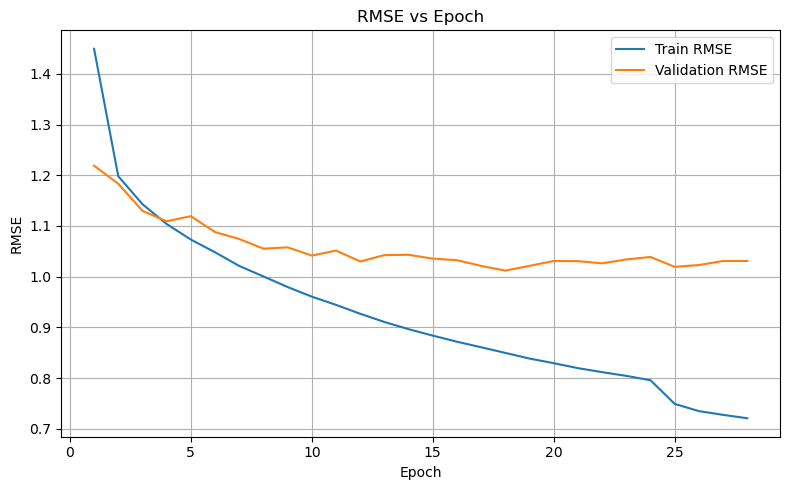

In [49]:
# Plot RMSE vs Epoch
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_rmse_list)+1), train_rmse_list, label="Train RMSE")
plt.plot(range(1, len(val_rmse_list)+1), val_rmse_list, label="Validation RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE vs Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Testing and Evaluation

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Re-initialize model
model = ModifiedMGATAFModel().to(device)

# Load best saved weights
model.load_state_dict(torch.load("models/modified_mgataf_best_model.pt"))
model.eval()

/tmp/ipykernel_7649/3741800949.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/modified_mgataf_best_model.pt"))


ModifiedMGATAFModel(
  (drug_encoder): DrugGraphEncoder(
    (gats): ModuleList(
      (0): GATConv(55, 128, heads=4)
      (1-2): 2 x GATConv(128, 128, heads=4)
    )
    (att_proj): Linear(in_features=128, out_features=1, bias=True)
  )
  (fp_encoder): FingerprintEncoder(
    (conv): Sequential(
      (0): Conv1d(1, 32, kernel_size=(8,), stride=(4,))
      (1): ReLU()
      (2): Conv1d(32, 64, kernel_size=(4,), stride=(2,))
      (3): ReLU()
    )
    (fc): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=16256, out_features=128, bias=True)
      (2): ReLU()
    )
  )
  (ccl_encoder): CellLineEncoder(
    (conv): Sequential(
      (0): Conv1d(1, 32, kernel_size=(8,), stride=(4,))
      (1): ReLU()
      (2): Conv1d(32, 64, kernel_size=(4,), stride=(2,))
      (3): ReLU()
    )
    (fc): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=5760, out_features=128, bias=True)
      (2): ReLU()
    )
  )
  (gsva_encode

In [54]:
from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

all_preds = []
all_labels = []

with torch.no_grad():
    for graph_data, fingerprint, ccl_feat, gsva_feat, label in test_loader:
        graph_data = graph_data.to(device)
        fingerprint = fingerprint.to(device)
        ccl_feat = ccl_feat.to(device)
        gsva_feat = gsva_feat.to(device)
        label = label.to(device)

        preds = model(graph_data, fingerprint, ccl_feat, gsva_feat)
        all_preds.append(preds.cpu().numpy())
        all_labels.append(label.cpu().numpy())

# Flatten predictions and labels
y_pred = np.concatenate(all_preds).flatten()
y_true = np.concatenate(all_labels).flatten()

# Compute metrics
test_rmse = root_mean_squared_error(y_true, y_pred)
test_pcc = pearsonr(y_true, y_pred)[0]

print(f"✅ Test RMSE: {test_rmse:.4f}")
print(f"✅ Test PCC:  {test_pcc:.4f}")


✅ Test RMSE: 1.0369
✅ Test PCC:  0.9294


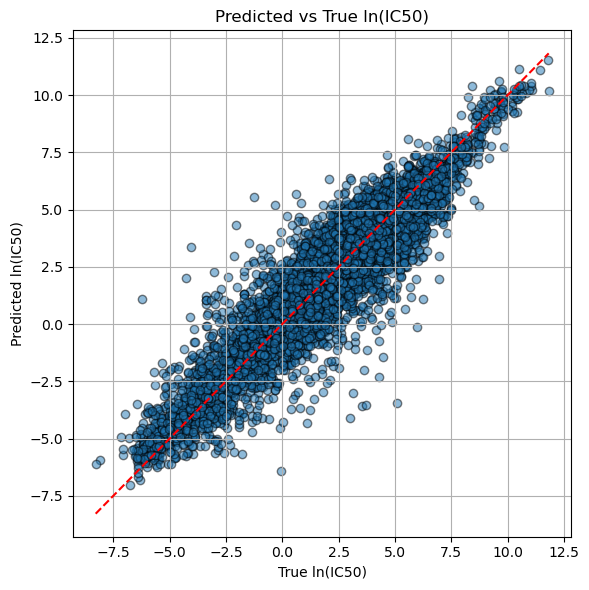

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='k')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("True ln(IC50)")
plt.ylabel("Predicted ln(IC50)")
plt.title("Predicted vs True ln(IC50)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
def print_parameter_breakdown(model):
    total = 0
    print("\nTrainable Parameters by Module:\n")
    for name, param in model.named_parameters():
        if param.requires_grad:
            count = param.numel()
            print(f"{name:<50} {count:>10}")
            total += count
    print(f"\nTotal Trainable Parameters: {total:,}")

print_parameter_breakdown(model)



Trainable Parameters by Module:

drug_encoder.gats.0.att_src                               512
drug_encoder.gats.0.att_dst                               512
drug_encoder.gats.0.bias                                  128
drug_encoder.gats.0.lin.weight                          28160
drug_encoder.gats.1.att_src                               512
drug_encoder.gats.1.att_dst                               512
drug_encoder.gats.1.bias                                  128
drug_encoder.gats.1.lin.weight                          65536
drug_encoder.gats.2.att_src                               512
drug_encoder.gats.2.att_dst                               512
drug_encoder.gats.2.bias                                  128
drug_encoder.gats.2.lin.weight                          65536
drug_encoder.att_proj.weight                              128
drug_encoder.att_proj.bias                                  1
fp_encoder.conv.0.weight                                  256
fp_encoder.conv.0.bias              